In [ ]:
from torchvision import datasets as dt
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim

# **Q3:**

## Dataset

In [ ]:
# load the training data
mnist = dt.MNIST('data', train=True, download=True)
mnist = list(mnist)[:2500]

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



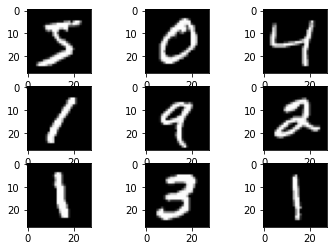

In [ ]:
# plot the first 12 images in the training data
import matplotlib.pyplot as plt
for k, (image, label) in enumerate(mnist[:9]):
  plt.subplot(3, 3, k+1)
  plt.imshow(image, cmap='gray')

In [ ]:
# transform the image data type to tensor
img_to_tensor = transforms.ToTensor()

In [ ]:
# convert the last image we saw into a tensor
img_tensor = img_to_tensor(image)
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# load the training data as tensor
mnist_train = dt.MNIST('data', train=True, transform=img_to_tensor)
mnist_train = list(mnist_train)[:2500]

In [ ]:
#split data into training and validation
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

In [ ]:
print(len(mnist_train))
x1, y1 = mnist_train[0]
print(x1.shape)

2000
torch.Size([1, 28, 28])


## Linear Model in PyTorch

In [ ]:
# assume 50 features, 1 linear output
simple_model = nn.Linear(50, 1)

In [ ]:
weight, bias = list(simple_model.parameters())

In [ ]:
# By default, PyTorch initializes these values to a random number close to 0
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[-0.1029,  0.0016, -0.0802,  0.0295, -0.1289, -0.0446,  0.0657, -0.0152,
          0.1279, -0.0752, -0.1239, -0.0426, -0.0923,  0.1403, -0.1346,  0.1149,
         -0.0173,  0.1366, -0.0826,  0.0375,  0.0046,  0.0137,  0.1071,  0.1413,
         -0.1377,  0.0474, -0.0657,  0.1191, -0.0241, -0.0424,  0.1228, -0.0277,
          0.0854,  0.1116,  0.0112, -0.0835, -0.1399,  0.0618, -0.0636,  0.0405,
         -0.1097, -0.0681,  0.0231, -0.1215,  0.0795,  0.1300,  0.0995,  0.0786,
          0.1367,  0.1312]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([0.0311], requires_grad=True)
torch.Size([1])


<font color='red'>Like the example above, create the model to solve the MNIST digitclassification problem.</font>

In [ ]:
############
# Your code
# Start
in_features = img_tensor.shape[1] * img_tensor.shape[2]
num_classes = 10

class MNISTModel(nn.Module):
    def __init__(self, in_features=in_features, out=num_classes):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear(x)
        return logits
# End


## Prediction

In [ ]:
def run_gradient_descent(model,batch_size=64,learning_rate=0.01,weight_decay=0,num_epochs=10):
    #define the best optimizer and loss function
    
    ############
    # Your code
    # Start
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()
    # End   
    
    iters, losses = [], []
    iters_sub, train_acc, val_acc = [], [] ,[]    

    # PyTorch data loader
    train_loader = torch.utils.data.DataLoader(
        mnist_train,
        batch_size=batch_size, # batch size
        shuffle=True) # shuffle before each epoch

    size = len(train_loader.dataset)
    # training
    for epoch in range(num_epochs):
        
        ############
        # Your code
        # Start
        # iterate on batches
        print("Epoch", epoch)
        epoch_loss = 0
        model.train()
        for batch, (x, y) in enumerate(train_loader):
            # forward propagation
            pred = model(x)
            loss = loss_fn(pred, y)
            epoch_loss += loss.item()

            # backward propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch % 10 == 0:
                loss, current = loss.item(), (batch + 1) * len(x)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        print("*"*20)

        # save loss for plot
        iters.append(epoch)
        losses.append(epoch_loss/size)
        # save accuracy for plot
        iters_sub.append(epoch)
        train_acc.append(get_accuracy(model, mnist_train))

        # evaluate model:
        model.eval()
        with torch.no_grad():
            val_acc.append(get_accuracy(model, mnist_val))
        # End   
        

    # plotting
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
    plt.plot(iters_sub, train_acc, label="Train")
    plt.plot(iters_sub, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

def get_accuracy(model, data):
  loader = torch.utils.data.DataLoader(data, batch_size=500)

  correct, total = 0, 0
  for xs, ts in loader:
      xs = xs.view(-1, 784) # flatten the image
      zs = model(xs)
      pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(ts.view_as(pred)).sum().item()
      total += int(ts.shape[0])
      return correct / total

Epoch 0
loss: 2.319465  [   64/ 2000]
loss: 2.229431  [  704/ 2000]
loss: 2.132955  [ 1344/ 2000]
loss: 2.064138  [ 1984/ 2000]
********************
Epoch 1
loss: 1.954598  [   64/ 2000]
loss: 1.969585  [  704/ 2000]
loss: 1.880140  [ 1344/ 2000]
loss: 1.762660  [ 1984/ 2000]
********************
Epoch 2
loss: 1.771670  [   64/ 2000]
loss: 1.682876  [  704/ 2000]
loss: 1.676434  [ 1344/ 2000]
loss: 1.614405  [ 1984/ 2000]
********************
Epoch 3
loss: 1.557897  [   64/ 2000]
loss: 1.507629  [  704/ 2000]
loss: 1.516667  [ 1344/ 2000]
loss: 1.375341  [ 1984/ 2000]
********************
Epoch 4
loss: 1.422207  [   64/ 2000]
loss: 1.441802  [  704/ 2000]
loss: 1.264468  [ 1344/ 2000]
loss: 1.266092  [ 1984/ 2000]
********************
Epoch 5
loss: 1.170196  [   64/ 2000]
loss: 1.253586  [  704/ 2000]
loss: 1.200905  [ 1344/ 2000]
loss: 1.238269  [ 1984/ 2000]
********************
Epoch 6
loss: 1.214502  [   64/ 2000]
loss: 1.050314  [  704/ 2000]
loss: 1.002373  [ 1344/ 2000]
loss: 0.

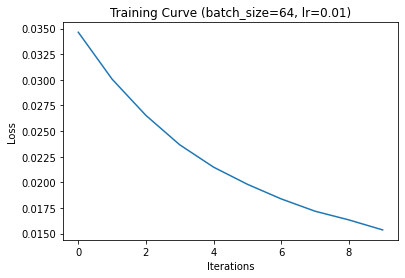

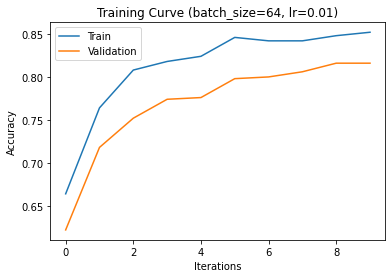

In [ ]:
model = MNISTModel() #create the model
run_gradient_descent(model, batch_size=64, learning_rate=0.01, num_epochs=10)

<font color='red'>plot model weight for each classes</font>

weight shape : (784, 10)

bias shape : (1, 10)

weight shape: torch.Size([10, 784])
bias shape: torch.Size([10])


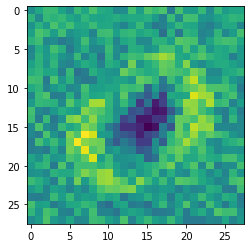

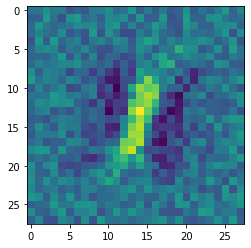

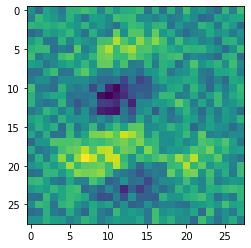

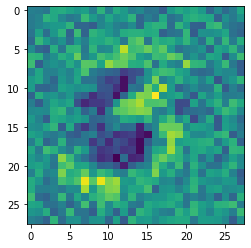

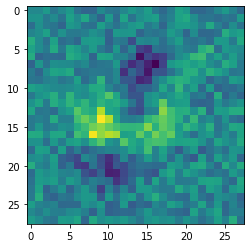

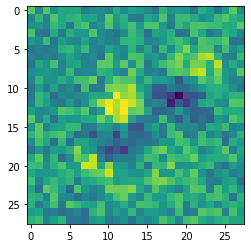

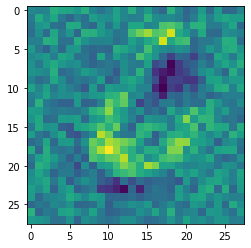

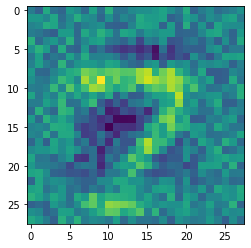

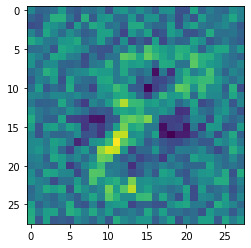

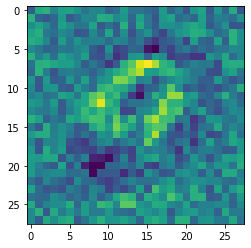

In [ ]:
w, b = model.parameters()

print("weight shape:", w.shape)
print("bias shape:", b.shape)
for w_class in w:
    w_reshaped = torch.reshape(w_class, (img_tensor.shape[1], img_tensor.shape[2]))
    plt.imshow(w_reshaped.detach().numpy())
    plt.show()

# **Q4:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error ,mean_absolute_error
import torch
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('./ETA.csv')

# ب:

In [ ]:
# 1-define X & Y then split train and test
# 2-define linear regression model
# 3-perdict y_pred
# 4-print MSE & MAE
#############################
      #input your code
#############################

# prepare data
x0 = torch.tensor(df['distance'] / df['speed'])
x1 = torch.tensor(df['traffic'])
x2 = torch.tensor(df['weather_conditions'])
X = torch.cat((torch.unsqueeze(x0, dim=1), torch.unsqueeze(x1, dim=1), torch.unsqueeze(x2, dim=1)), 1)
y = torch.tensor(df['Time_Arrival'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("train shape", X_train.shape, y_train.shape)
print("test shape", X_test.shape, y_test.shape)

# linear regression model
reg = LinearRegression().fit(X_train, y_train)
train_prediction = reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_prediction)
train_mae = mean_absolute_error(y_train, train_prediction)
print("MSE train", train_mse)
print("MAE train", train_mae)

# predict on test data
test_prediction = reg.predict(X_test)
test_mse = mean_squared_error(y_test, test_prediction)
test_mae = mean_absolute_error(y_test, test_prediction)
print("MSE test", test_mse)
print("MAE test", test_mae)

train shape torch.Size([1600, 3]) torch.Size([1600])
test shape torch.Size([400, 3]) torch.Size([400])
MSE train 2.827727381547115e-30
MAE train 1.3616885397027546e-15
MSE test 2.8330891705122892e-30
MAE test 1.3786194408282882e-15


In [ ]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
step_size = 0.006  #  for optimiser GD
epoch = 3500

Train model using MSE loss

In [ ]:
# 1-difine X & Y 
# 2-defin forward & loss function
# 3-write train loop
# 4-print MSE & MAE
# 5-plot loss
#############################
      #input your code
#############################

# prepare data
x0 = torch.tensor(df['distance'] / df['speed'])
x1 = torch.tensor(df['traffic'])
x2 = torch.tensor(df['weather_conditions'])
X = torch.cat((torch.unsqueeze(x0, dim=1), torch.unsqueeze(x1, dim=1), torch.unsqueeze(x2, dim=1)), 1)
y = torch.tensor(df['Time_Arrival'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

def mse_loss(output, target):
    loss = torch.mean((output - target)**2)
    return loss


for e in range(epoch):
    output = X_train.T[0] * w0 + X_train.T[1] * w1 + X_train.T[2] * w2 + b
    # MSE loss function
    loss = mse_loss(output, y_train)
    if e % 100 == 0:
        print(f"Epoch {e}: train MSE loss {loss}")

    # calculate gradients
    loss.backward()
    # update parameters
    with torch.no_grad():
        w0 -= step_size * w0.grad
        w1 -= step_size * w1.grad
        w2 -= step_size * w2.grad
        b -= step_size * b.grad

    # zero the gradients
    w0.grad.zero_()
    w1.grad.zero_()
    w2.grad.zero_()
    b.grad.zero_()

test_prediction = X_test.T[0] * w0 + X_test.T[1] * w1 + X_test.T[2] * w2 + b
print("test MSE loss", mse_loss(test_prediction, y_test))

Epoch 0: train MSE loss 17122.408552746467
Epoch 100: train MSE loss 32.67808298479283
Epoch 200: train MSE loss 27.2307204665066
Epoch 300: train MSE loss 23.232975078686465
Epoch 400: train MSE loss 20.103561670961902
Epoch 500: train MSE loss 17.540723378720344
Epoch 600: train MSE loss 15.380171379624729
Epoch 700: train MSE loss 13.526364706908153
Epoch 800: train MSE loss 11.918950455492368
Epoch 900: train MSE loss 10.516482270275016
Epoch 1000: train MSE loss 9.288173153023381
Epoch 1100: train MSE loss 8.20981642801157
Epoch 1200: train MSE loss 7.26156505507573
Epoch 1300: train MSE loss 6.42672416945466
Epoch 1400: train MSE loss 5.691043296723006
Epoch 1500: train MSE loss 5.042224981038125
Epoch 1600: train MSE loss 4.469609484386546
Epoch 1700: train MSE loss 3.9639119418398674
Epoch 1800: train MSE loss 3.5170376448878113
Epoch 1900: train MSE loss 3.121912840665345
Epoch 2000: train MSE loss 2.772349370704901
Epoch 2100: train MSE loss 2.462922576001187
Epoch 2200: trai

Train model using MAE loss

In [ ]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
step_size = 0.006  #  for optimiser GD
epoch = 3500

In [ ]:
# prepare data
x0 = torch.tensor(df['distance'] / df['speed'])
x1 = torch.tensor(df['traffic'])
x2 = torch.tensor(df['weather_conditions'])
X = torch.cat((torch.unsqueeze(x0, dim=1), torch.unsqueeze(x1, dim=1), torch.unsqueeze(x2, dim=1)), 1)
y = torch.tensor(df['Time_Arrival'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

def mae_loss(output, target):
    loss = torch.mean(torch.abs(output - target))
    return loss


for e in range(epoch):
    output = X_train.T[0] * w0 + X_train.T[1] * w1 + X_train.T[2] * w2 + b
    # MAE loss function
    loss = mae_loss(output, y_train)
    if e % 100 == 0:
        print(f"Epoch {e}: train MAE loss {loss}")

    # calculate gradients
    loss.backward()
    # update parameters
    with torch.no_grad():
        w0 -= step_size * w0.grad
        w1 -= step_size * w1.grad
        w2 -= step_size * w2.grad
        b -= step_size * b.grad

    # zero the gradients
    w0.grad.zero_()
    w1.grad.zero_()
    w2.grad.zero_()
    b.grad.zero_()

test_prediction = X_test.T[0] * w0 + X_test.T[1] * w1 + X_test.T[2] * w2 + b
print("test MAE loss", mae_loss(test_prediction, y_test))

Epoch 0: train MAE loss 118.88770880901967
Epoch 100: train MAE loss 48.277304796914635
Epoch 200: train MAE loss 5.124812519464308
Epoch 300: train MAE loss 5.085509007187506
Epoch 400: train MAE loss 5.046660001991217
Epoch 500: train MAE loss 5.00829776107772
Epoch 600: train MAE loss 4.970594210321275
Epoch 700: train MAE loss 4.933638137807737
Epoch 800: train MAE loss 4.897210820971126
Epoch 900: train MAE loss 4.861437356872408
Epoch 1000: train MAE loss 4.826178363048609
Epoch 1100: train MAE loss 4.7915538308930685
Epoch 1200: train MAE loss 4.757496340540033
Epoch 1300: train MAE loss 4.724047644833389
Epoch 1400: train MAE loss 4.690739737955052
Epoch 1500: train MAE loss 4.658053458304512
Epoch 1600: train MAE loss 4.625683446305234
Epoch 1700: train MAE loss 4.594087546661146
Epoch 1800: train MAE loss 4.56303647805294
Epoch 1900: train MAE loss 4.5323453770740025
Epoch 2000: train MAE loss 4.502028043237629
Epoch 2100: train MAE loss 4.471983263135915
Epoch 2200: train MA

# ج:

In [ ]:
step_size = 0.006  #  for optimiser GD
epoch = 3500

In [ ]:
# 1-difine X & Y 
# 2-define subset of data
# 3-write train loop
# 4-plot & analysis w0,w1,w2,b,loss
#############################
      #input your code
#############################
import random 

# prepare data
x0 = torch.tensor(df['distance'] / df['speed'])
x1 = torch.tensor(df['traffic'])
x2 = torch.tensor(df['weather_conditions'])
X = torch.cat((torch.unsqueeze(x0, dim=1), torch.unsqueeze(x1, dim=1), torch.unsqueeze(x2, dim=1)), 1)
y = torch.tensor(df['Time_Arrival'])

indices = list(range(X.shape[0]))
w0_experiments = []
w1_experiments = []
w2_experiments = []
b_experiments = []

def mse_loss(output, target):
    loss = torch.mean((output - target)**2)
    return loss

for experiment in range(100):
    rnd_indices = random.sample(indices, 300)
    X_train = X[rnd_indices]
    y_train = y[rnd_indices]

    # reinitialize parameters
    w0 = torch.tensor(10.0, requires_grad=True)
    w1 = torch.tensor(15.0, requires_grad=True)
    w2 = torch.tensor(-10.0, requires_grad=True)
    b = torch.tensor(-20.0, requires_grad=True)

    for e in range(epoch):
        output = X_train.T[0] * w0 + X_train.T[1] * w1 + X_train.T[2] * w2 + b
        # MSE loss function
        loss = mse_loss(output, y_train)

        # calculate gradients
        loss.backward()
        # update parameters
        with torch.no_grad():
            w0 -= step_size * w0.grad
            w1 -= step_size * w1.grad
            w2 -= step_size * w2.grad
            b -= step_size * b.grad

        # zero the gradients
        w0.grad.zero_()
        w1.grad.zero_()
        w2.grad.zero_()
        b.grad.zero_()

    w0_experiments.append(w0)
    w1_experiments.append(w1)
    w2_experiments.append(w2)
    b_experiments.append(b)

w0 average: 3.6332008838653564, variance: 0.13029105961322784 



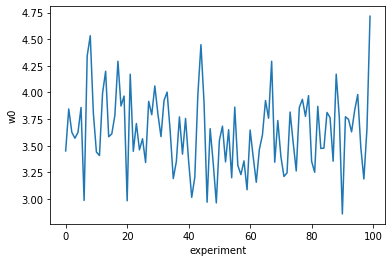



w1 average: 3.186239242553711, variance: 0.05484401062130928 



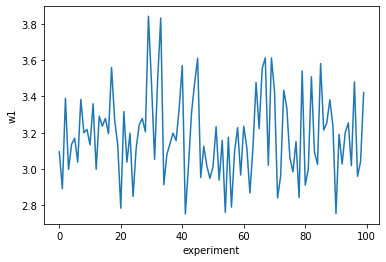



w2 average: 0.03417643532156944, variance: 7.26003127056174e-05 



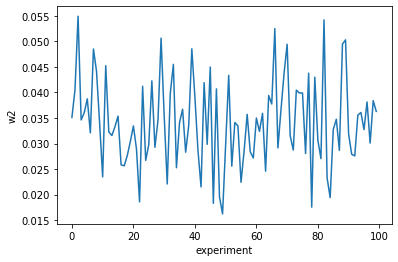



b average: -1.2790424823760986, variance: 0.08018049597740173 



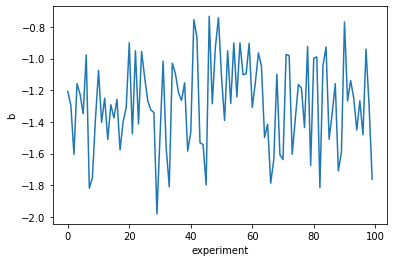

In [ ]:
def plot_weights(weight, title):
    w = [x.detach().numpy() for x in weight]
    avg = np.mean(w)
    var = np.var(w)
    print(f'{title} average: {avg}, variance: {var}', '\n')

    plt.plot(w)
    plt.xlabel("experiment")
    plt.ylabel(title)
    plt.show()

    print('\n')

plot_weights(w0_experiments, "w0")
plot_weights(w1_experiments, "w1")
plot_weights(w2_experiments, "w2")
plot_weights(b_experiments, "b")

# Q5

Write all the parts yourself

# ت:

In [ ]:
df_disease = pd.read_csv('./heart_disease.csv')
df_disease.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# prepocess data and delete null rows
new_df_disease = df_disease.dropna()
print("data rows:", df_disease.shape[0])
print("data rows after preprocess:", new_df_disease.shape[0])

data rows: 4238
data rows after preprocess: 3656


In [ ]:
from sklearn.linear_model import LogisticRegression

X = new_df_disease.drop('TenYearCHD', axis=1)
y = new_df_disease['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print("train data accuracy", train_acc)
print("test data accuracy", test_acc)

train data accuracy 0.8512311901504788
test data accuracy 0.8387978142076503
